2	0.55145
4	0.29242
8	0.03226
16	0.01449
32	0.00708
64	0.00352
128	0.00176
256	0.00088
512	0.00044
c =  0.873
q = -1.302


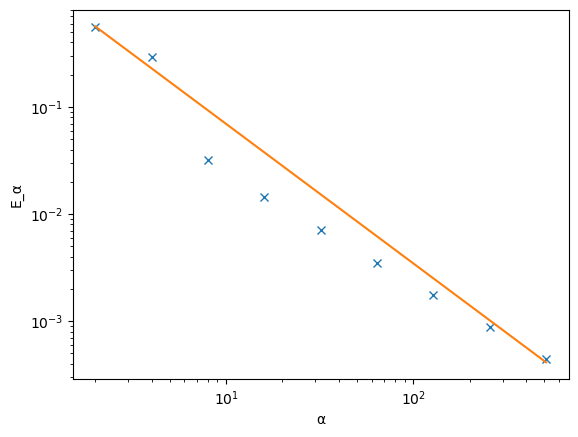

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sinc(x):
    if x == 0:
        return 1
    return np.sin(np.pi*x)/(np.pi*x)

def v(x):
    return np.sin(np.pi*x/2)  

def p_alpha(x,alpha):
    return sum([v(m)*sinc(x-m) for m in range(-alpha,alpha+1)])

alphas = [2**k for k in range(1,10)] 
errors = []

for alpha in alphas:
    integrand = lambda x: (p_alpha(x,alpha) - v(x))**2
    integral = integrate.quad(integrand, -5, 5)[0]
    
    E_alpha = np.sqrt(1/10 * integral) 
    errors.append(E_alpha)

for alpha, error in zip(alphas, errors):
    print(f"{alpha}\t{error:.5f}")

def fit(x,c,q):
    return c*(x**q)
    
popt, pcov = curve_fit(fit, alphas, errors)

plt.loglog(alphas, errors, 'x')  
plt.loglog(alphas, fit(alphas, *popt))
plt.xlabel('α')
plt.ylabel('E_α')

print(f'c = {popt[0]:.3f}') 
print(f'q = {popt[1]:.3f}')
